In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#taking data from the url

url='http://bit.ly/drinksbycountry'

In [3]:
#convert data into tabular formate

pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url,sep=",")

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [5]:
data=pd.read_csv('D:/afsal/beer-servings.csv')

In [6]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
data=pd.read_csv('D:/afsal/beer-servings.csv',index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [9]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [10]:
# to handle the missing values
# filing missing values
# check the datatypes of column

data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

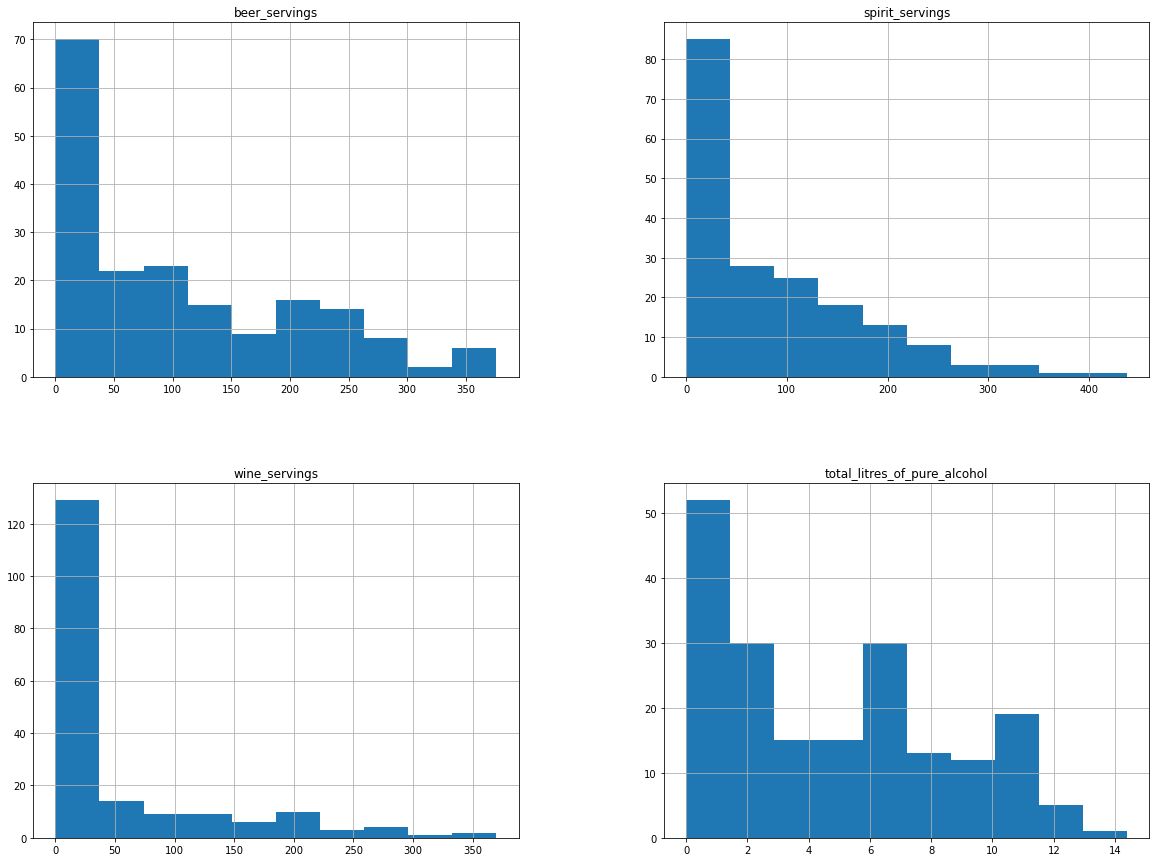

In [11]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show

In [12]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [13]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())
#check the null values
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [14]:
for i in ['spirit_servings','wine_servings',
         'total_litres_of_pure_alcohol']:
    data[i]=data[i].fillna(data[i].median())

In [15]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [16]:
#take the mean of beer servings with respect to difference continents
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [17]:
data.country.nunique()

#the unique strng or object is that column country

193

In [18]:
data.drop('country',axis=1,inplace=True)

In [19]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'box plot of beer servings')

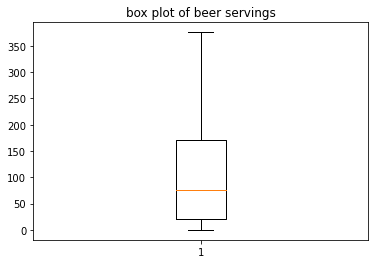

In [20]:


#outliers in beer columns
plt.boxplot(data['beer_servings'])
plt.title('box plot of beer servings')
# no outliers

Text(0.5, 1.0, 'Box plot of beer servings')

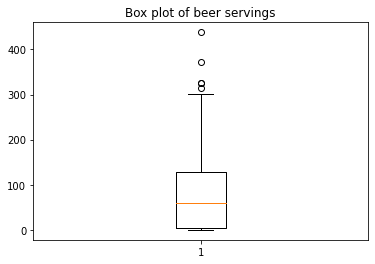

In [21]:

plt.boxplot(data['spirit_servings'])
plt.title('Box plot of beer servings')

In [22]:
q1=np.percentile(data['spirit_servings'],25, interpolation='midpoint')
q2=np.percentile(data['spirit_servings'],50, interpolation='midpoint')
q3=np.percentile(data['spirit_servings'],75, interpolation='midpoint')
print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


In [23]:
data['spirit_servings'].median()

60.0

In [24]:
#inter quartile range
iqr=q3-q1


low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)

-179.5
312.5


In [25]:
#remove values below -179.5 and above 312.5

outlier=[]
for x in data['spirit_servings']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)
        
outlier        
        

[373.0, 438.0, 326.0, 326.0, 315.0]

In [26]:

#find the index of outliers

ind1=data['spirit_servings']>up_limit
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [27]:
data.drop([15,68,73,141,144],inplace=True)

Text(0.5, 1.0, 'Box plot of beer servings')

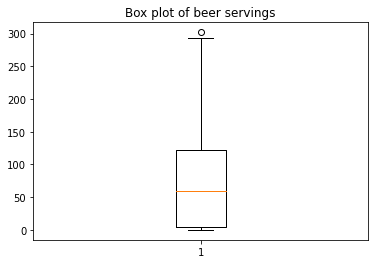

In [28]:
#plot the sprit_serving column again
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'Box plot of wine servings')

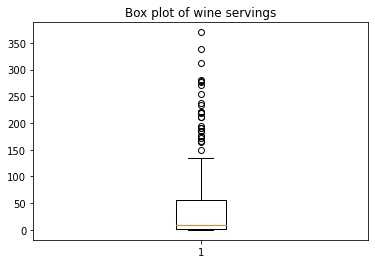

In [29]:

#check outlier in winw sevng column
plt.boxplot(data['wine_servings'])
plt.title('Box plot of wine servings')

In [30]:
q1=np.percentile(data['wine_servings'],25, interpolation='midpoint')
q2=np.percentile(data['wine_servings'],50, interpolation='midpoint')
q3=np.percentile(data['wine_servings'],75, interpolation='midpoint')
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)


-83.75
142.25


In [31]:
outlier=[]
for x in data['wine_servings']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)

In [32]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [33]:
ind1=data['wine_servings']>up_limit
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [34]:
data.drop([3, 6, 9,16,35,42,48,55,61,64,65,67,
           75,81,83,99,120,121,136,140,156,165,166,182,185],inplace=True)

Text(0.5, 1.0, 'Box plot of beer servings')

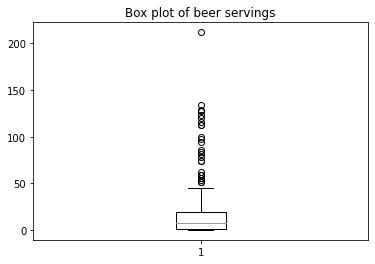

In [35]:
plt.boxplot(data['wine_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'box plot of total_litres_of_pure_alcohol')

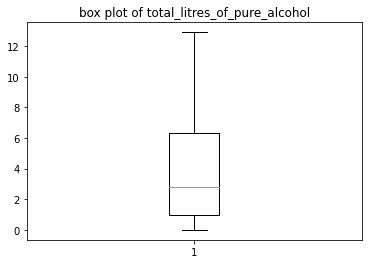

In [36]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('box plot of total_litres_of_pure_alcohol')

In [37]:

data.shape

(163, 5)

In [38]:
data.continent.nunique()

6

In [39]:
data=pd.get_dummies(data)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


<AxesSubplot:>

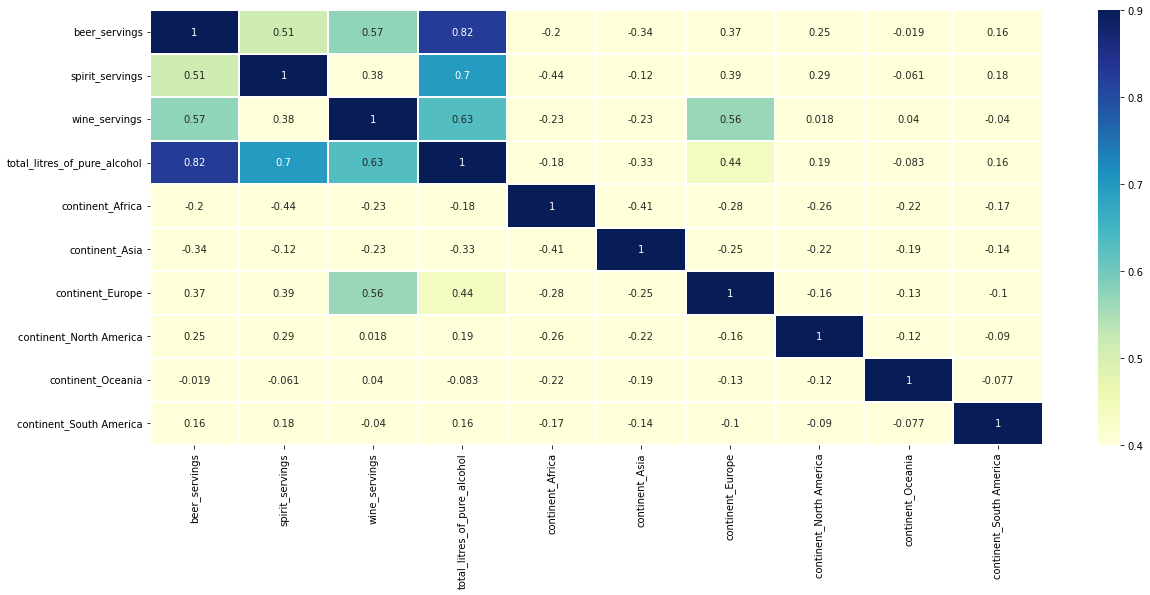

In [40]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [41]:
#split the dataset and creaate and model

data.columns
y=data['total_litres_of_pure_alcohol']
x=data.drop('total_litres_of_pure_alcohol',axis=1)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
#create linear model

from sklearn import linear_model
lr=linear_model.LinearRegression()

model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error
print('MSE Is:',mean_squared_error(y_test,prediction))

MSE Is: 1.961961828125817


In [45]:
from sklearn.metrics import r2_score
print('R squared value iis:',r2_score(y_test,prediction))

R squared value iis: 0.7901416327969426


In [46]:
#feature scalling
#standard scaling 
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,87.662577,72.239264,21.773006,0.319018,0.263804,0.147239,0.122699,0.092025,0.055215
std,92.691791,79.060833,36.453810,0.467533,0.442052,0.355436,0.329103,0.289951,0.229103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,44.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,119.500000,19.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,212.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
type(x)


pandas.core.frame.DataFrame

In [48]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
x=standards.fit_transform(x)

In [49]:
x.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [50]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02
mean,-6.402513e-17,-1.839020e-17,-1.089789e-17,1.117034e-16,1.607439e-16,-1.634684e-17,-1.294125e-17,7.696638e-17,-1.174929e-16
std,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00,1.003082e+00
min,-9.486571e-01,-9.165332e-01,-5.991172e-01,-6.844476e-01,-5.986095e-01,-4.155260e-01,-3.739788e-01,-3.183573e-01,-2.417469e-01
25%,-7.592775e-01,-8.784708e-01,-5.716007e-01,-6.844476e-01,-5.986095e-01,-4.155260e-01,-3.739788e-01,-3.183573e-01,-2.417469e-01
50%,-3.426425e-01,-3.582847e-01,-4.065016e-01,-6.844476e-01,-5.986095e-01,-4.155260e-01,-3.739788e-01,-3.183573e-01,-2.417469e-01
75%,5.014492e-01,5.996190e-01,-6.254520e-02,1.461032e+00,1.670538e+00,-4.155260e-01,-3.739788e-01,-3.183573e-01,-2.417469e-01
max,3.120298e+00,2.915082e+00,5.234383e+00,1.461032e+00,1.670538e+00,2.406588e+00,2.673948e+00,3.141125e+00,4.136558e+00


In [51]:
#again create a linear regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE IS',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))
#standard scaler not done any effet on the dataset

MSE IS 1.9619618281258162
R squared value is: 0.7901416327969427


In [52]:
#min-max scaling
#we change the feature set x by standard scalling. again take x from the dataset
x=data.drop('total_litres_of_pure_alcohol',axis=1)
x.describe()


,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,87.662577,72.239264,21.773006,0.319018,0.263804,0.147239,0.122699,0.092025,0.055215
std,92.691791,79.060833,36.453810,0.467533,0.442052,0.355436,0.329103,0.289951,0.229103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,44.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,119.500000,19.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,212.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:


min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
#apply this scaling to x
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.233145,0.239203,0.102703,0.319018,0.263804,0.147239,0.122699,0.092025,0.055215
std,0.246521,0.261791,0.171952,0.467533,0.442052,0.355436,0.329103,0.289951,0.229103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046543,0.009934,0.004717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.148936,0.145695,0.033019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.356383,0.395695,0.091981,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE IS',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE IS 1.961961828125818
R squared value is: 0.7901416327969426


In [55]:
#normalization
#normalization is also done in feature set,so again load the feature set x
x=data.drop('total_litres_of_pure_alcohol',axis=1)
x.describe()


,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,87.662577,72.239264,21.773006,0.319018,0.263804,0.147239,0.122699,0.092025,0.055215
std,92.691791,79.060833,36.453810,0.467533,0.442052,0.355436,0.329103,0.289951,0.229103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,44.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,134.000000,119.500000,19.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,212.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
x=preprocessing.normalize(x)

In [57]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.649665,0.473595,0.146564,0.031670,0.046455,0.012915,0.000691,0.007407,0.000296
std,0.324900,0.342775,0.184704,0.138569,0.190009,0.110375,0.002081,0.078385,0.001311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407519,0.148947,0.017260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.758997,0.495074,0.070678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.939720,0.794350,0.213928,0.010473,0.004120,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [58]:
#again create a linear regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE IS',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))


MSE IS 8.862950570025683
R squared value is: 0.05198750120243412


<AxesSubplot:>

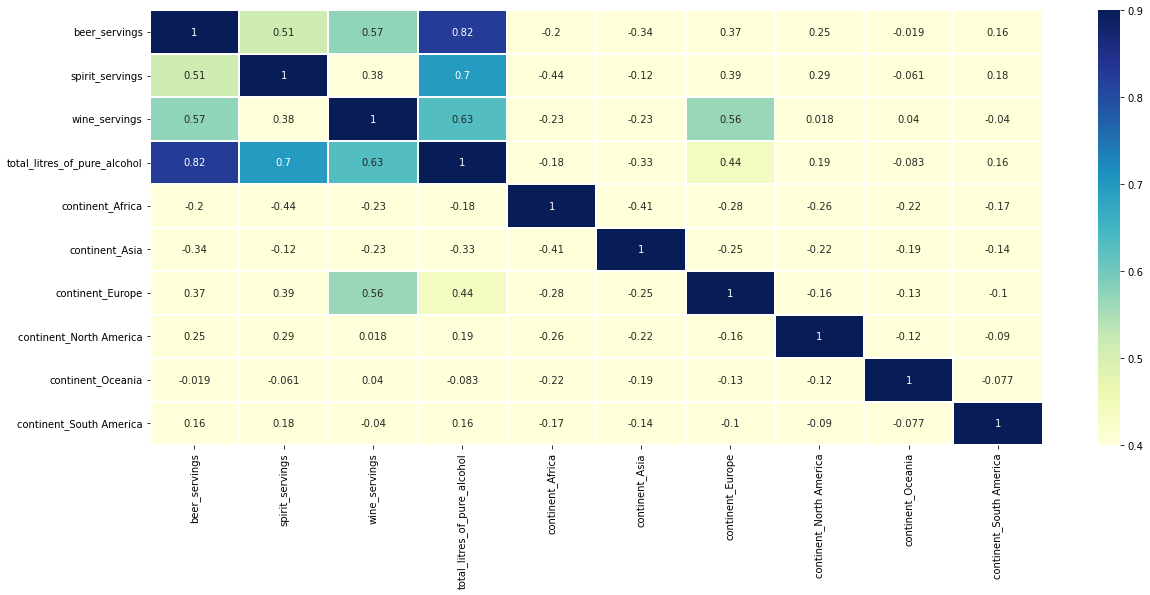

In [62]:
#featured reduction
#and check the model is improving

corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [63]:
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [64]:
#drop the column in high correlation
data.drop(['spirit_servings','wine_servings'],axis=1,inplace=True)

In [65]:
#again create a linear regresssion model
y=data['total_litres_of_pure_alcohol']
x=data.drop('total_litres_of_pure_alcohol',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('MSE IS',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSE IS 3.5563393107785473
R squared value is: 0.6196013855718239


In [75]:
# MERGING
df1=pd.DataFrame({"anu":[80,95,65,32,105],
                 "manju":[87,45,12,64,45],
                 "abcd":[36,44,56,91,50]},
                index=[2009,2010,2011,2012,2013])

In [76]:
df2=pd.DataFrame({"anu":[80,95,65,32,105],
                 "abc":[36,44,56,91,50],
                 "xyz":[87,45,12,64,45]},
                index=[2005,2006,2007,2008,2009])

In [77]:
pd.merge(df1,df2,on='anu')

,anu,manju,abcd,abc,xyz
0,80,87,36,36,87
1,95,45,44,44,45
2,65,12,56,56,12
3,32,64,91,91,64
4,105,45,50,50,45


In [78]:
# JOINING
df3=pd.DataFrame({"anu":[80,95,65,32,105],
                 "def":[87,45,12,64,45],
                 "ghi":[36,44,56,91,50]})
                

In [81]:
df4=pd.DataFrame({"klm":[45,23,65,12,100],
                 "abc":[88,56,78,96,20],
                 "xyz":[12,56,78,95,111]})
                

In [82]:
join_data=df3.join(df4)

In [83]:
join_data

,anu,def,ghi,klm,abc,xyz
0,80,87,36,45,88,12
1,95,45,44,23,56,56
2,65,12,56,65,78,78
3,32,64,91,12,96,95
4,105,45,50,100,20,111


In [84]:
# CONCATENATION
df5=pd.DataFrame({"anu":[12,45,63,12,78],
                 "uvw":[65,13,45,78,65],
                 "qrs":[78,95,65,45,14]})

In [85]:
cancat_data=pd.concat([df4,df5],axis=1)

In [87]:
cancat_data

,klm,abc,xyz,anu,uvw,qrs
0,45,88,12,12,65,78
1,23,56,56,45,13,95
2,65,78,78,63,45,65
3,12,96,95,12,78,45
4,100,20,111,78,65,14
